# Cat Dog Image Classification

In this notebook, we use an existing trained model to classify an image.


## Setup our model

In [9]:
import tensorflow as tf
import os
import PIL

from urllib import request
from io import BytesIO


## Load Model

Here we define a function that will load a previously trained model.

In [10]:
def restore_model(name="cats_dogs_trained_model", verbose=False):
    if not os.path.exists(name):
        raise Exception(f"Cannot find {name} model to restore.")
    
    model = tf.keras.models.load_model(name)
    
    if verbose:
        model.summary()
    
    return model
    

In [11]:
model = restore_model("cats_dogs_trained_model")

## Predict using url

In [30]:
IMG_HEIGHT = 150
IMG_WIDTH = 150
batch_size = 128

def print_prediction(predictions):
    score = predictions[0]
    print(score)
    print(
        "This image is %.2f percent cat and %.2f percent dog."
        % (100 * (1 - score), 100 * score)
    )



In [31]:
from urllib import request
from io import BytesIO


def get_imgurl_array(url, verbose=False):
    res = request.urlopen(url).read()
    img = PIL.Image.open(BytesIO(res)).resize((IMG_HEIGHT, IMG_WIDTH))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    if verbose:
        print(f"Image Shape is {img_array.shape}\n")
        print("\n")
        print("Before rescaling", img_array[0][:5], sep="\n")
        print("\n")
    
    # Our Model expects values to be between 0 and 1, not 0 to 255.
    img_array = img_array / 255.0
    if verbose:
        print("After rescaling", img_array[0][:5], sep="\n")
        print("\n")
    
    # Create batch axis
    img_array = tf.expand_dims(img_array, axis=0)
    if verbose:
        print(f"After Adding Batch Image Shape is {img_array.shape}")
        print("\n")
    
    return img_array, img




In [32]:
url = input('Please enter Image url:')
if url == "":
    print("URL is empty. WIll go ahead wil default URL")
    url = "https://ichef.bbci.co.uk/news/800/cpsprodpb/12A9B/production/_111434467_gettyimages-1143489763.jpg"

img_array, img = get_imgurl_array(url, True)

URL is empty. WIll go ahead wil default URL
Image Shape is (150, 150, 3)



Before rescaling
[[135. 131. 119.]
 [137. 133. 121.]
 [137. 133. 121.]
 [138. 134. 122.]
 [139. 135. 123.]]


After rescaling
[[0.5294118  0.5137255  0.46666667]
 [0.5372549  0.52156866 0.4745098 ]
 [0.5372549  0.52156866 0.4745098 ]
 [0.5411765  0.5254902  0.47843137]
 [0.54509807 0.5294118  0.48235294]]


After Adding Batch Image Shape is (1, 150, 150, 3)




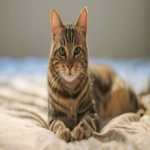

In [33]:
img

In [34]:
# TIME TO PREDICT
predictions = model.predict(img_array)
print_prediction(predictions)

[0.23749125]
This image is 76.25 percent cat and 23.75 percent dog.


## Predict using Local file

You can specify any image stored locally to predict. Or skip this step if you would like to specify an image url.

In [25]:
IMG_HEIGHT = 150
IMG_WIDTH = 150
batch_size = 128

def get_img(name, verbose=False):

    if verbose:
        print(f"Image Location is {name}\n")
        #PIL.Image.open(img)

    if not os.path.exists(name):
        raise Exception(f"Cannot find {name} image.")

    img = tf.keras.preprocessing.image.load_img(name, target_size=(IMG_HEIGHT, IMG_WIDTH))
    return img




In [21]:
def get_img_array(name, verbose=False):
    img = get_img(name, verbose)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    if verbose:
        print(f"Image Shape is {img_array.shape}\n")
        print("\n")
        print("Before rescaling", img_array[0][:5], sep="\n")
        print("\n")
    
    # Our Model expects values to be between 0 and 1, not 0 to 255.
    img_array = img_array / 255.0
    if verbose:
        print("After rescaling", img_array[0][:5], sep="\n")
        print("\n")
    
    # Create batch axis
    img_array = tf.expand_dims(img_array, axis=0)
    if verbose:
        print(f"After Adding Batch Image Shape is {img_array.shape}")
        print("\n")
    
    return img_array


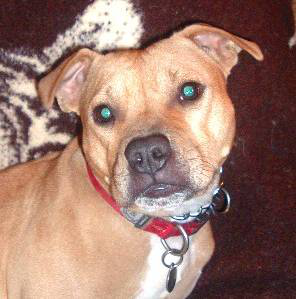

In [28]:
img = input('Please enter file name: example ./cats_and_dogs/test/1.jpg')
if img == "":
    img = "./cats_and_dogs/test/2.jpg"

img_array = get_img_array(img)
PIL.Image.open(img)

In [29]:
# TIME TO PREDICT
predictions = model.predict(img_array)
print_prediction(predictions)

[0.56965137]
This image is 43.03 percent cat and 56.97 percent dog.
